In [1]:
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# Отображение всего вывода(по умолчанию отображается только последний)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Series
**Создание Обьекта Series из 3 элементов , индексированными буквами**

In [2]:
salaries_word = pd.Series([400,300,200],index=['Lindy Booth','Lindsey Striling','Eva Green'])
salaries_word

Lindy Booth         400
Lindsey Striling    300
Eva Green           200
dtype: int64

*Добавление в Series(Производится как в словаре. Ключ-значение)*


In [3]:
salaries_word['Carl'] = np.nan
salaries_word

Lindy Booth         400.0
Lindsey Striling    300.0
Eva Green           200.0
Carl                  NaN
dtype: float64

** Создание объекта Series с цифровыми индексами(тот что по умолчанию)**


In [4]:
salaries =pd.Series([400,300,200])
salaries

0    400
1    300
2    200
dtype: int64

**Условие для series**

In [5]:
salaries[salaries>200]
salaries_word['Lindy Booth']

0    400
1    300
dtype: int64

400.0

*Индексирование возможно в виде s.Name или s['Name'].*

In [6]:
salaries_word.Carl# Такое индексирование возможно если в ключе нет пробелов
# salaries_word.Lindy Booth -вызовет ошибку
# В случае цифрового индекса- так можно
salaries[1]
# А так будет ошибка
#salaries.1
salaries_word

nan

300

Lindy Booth         400.0
Lindsey Striling    300.0
Eva Green           200.0
Carl                  NaN
dtype: float64

###Заполнение пропущеных значений


In [7]:
#Заполнение константой
salaries_word.fillna(1,inplace=True)
# inplace=True - отвечает будет ли изменятся первоначальный объект
salaries_word

Lindy Booth         400.0
Lindsey Striling    300.0
Eva Green           200.0
Carl                  1.0
dtype: float64

In [8]:
salaries['John'] = np.nan

In [9]:
# Заполнение пропущенных значений результатом работы функции или произвольной строкой
salaries.fillna(salaries.median())
salaries.fillna('placeholder')

0       400.0
1       300.0
2       200.0
John    300.0
dtype: float64

0               400
1               300
2               200
John    placeholder
dtype: object

#### Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.

In [10]:
print('Second element of salaries is', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print('There are', len(salaries[salaries > 0]), 'positive elements in salaries\n')
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

0    400.0
1    300.0
2    200.0
dtype: float64 

There are 3 positive elements in salaries

0       5.221470e+173
1       1.942426e+130
2        7.225974e+86
John              NaN
dtype: float64


# Data Frame
### Создание и изменение
#### Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.

In [11]:
df1= pd.DataFrame(np.random.randn(5,3),
                 index=['o1', 'o2', 'o3', 'o4', 'o5'],
                 columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,1.193549,1.048225,0.020913
o2,1.612039,0.329119,-0.518939
o3,0.453882,0.232025,1.216842
o4,2.215765,-2.118323,-0.474528
o5,0.578257,0.547137,-0.644695


Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.

In [12]:
df2 = pd.DataFrame({'A':np.random.random(5),
                   'B':['a', 'b', 'c', 'd', 'e'],
                   'C':np.arange(5) > 2},index=['o1', 'o2', 'o3', 'o4', 'o5'])
df2

,A,B,C
o1,0.233109,a,False
o2,0.500153,b,False
o3,0.516870,c,False
o4,0.334222,d,True
o5,0.470670,e,True


#### Обращение к элементам (или целым кускам фрейма):

In [13]:
print('The element in position o3,B is',df2.at['o3','A'],'\n')

The element in position o3,B is 0.5168697899752935 



In [14]:
# df.loc обращение по ключу
print(df2.loc[['o1','o2'],['A','B']])

           A  B
o1  0.233109  a
o2  0.500153  b


In [15]:
#df.iloc обращение по индексу
print(df2.iloc[:2,:1])

           A
o1  0.233109
o2  0.500153


In [16]:
# Копирование части фрейма
df3 = df2.loc[['o4']]
df3
df4 = df3.iloc[:,:2]
df4

,A,B,C
o4,0.334222,d,True


,A,B
o4,0.334222,d


#### Изменение элементов и добавление новых:

In [17]:
df2

,A,B,C
o1,0.233109,a,False
o2,0.500153,b,False
o3,0.516870,c,False
o4,0.334222,d,True
o5,0.470670,e,True


In [18]:
# Изменение конкретного значения
# df.at[строка,столбец]=значение
df2.at['o2','B']= 'Lindy Booth'
df2

,A,B,C
o1,0.233109,a,False
o2,0.500153,Lindy Booth,False
o3,0.516870,c,False
o4,0.334222,d,True
o5,0.470670,e,True


In [19]:
# Изменение целой строки
df2.loc['o5'] = [400,'Lindsey Stirling',True]
df2

,A,B,C
o1,0.233109,a,False
o2,0.500153,Lindy Booth,False
o3,0.516870,c,False
o4,0.334222,d,True
o5,400.000000,Lindsey Stirling,True


In [20]:
# Добавление строки
df2.loc['o6'] = [400,'Lindsey Stirling',True]
df2

,A,B,C
o1,0.233109,a,False
o2,0.500153,Lindy Booth,False
o3,0.516870,c,False
o4,0.334222,d,True
o5,400.000000,Lindsey Stirling,True
o6,400.000000,Lindsey Stirling,True


In [21]:
# Удаление строки
df2.drop('o6')

,A,B,C
o1,0.233109,a,False
o2,0.500153,Lindy Booth,False
o3,0.516870,c,False
o4,0.334222,d,True
o5,400.000000,Lindsey Stirling,True


In [22]:
# Слияние 2 дата фреймов
# Для этого количества и названия колонок должны совпадать и индексы должны отличаться
df1
df1.columns = ['A','B','C']
df1.index=range(5)
df4 = df1.append(df2)
df4

,f1,f2,f3
o1,1.193549,1.048225,0.020913
o2,1.612039,0.329119,-0.518939
o3,0.453882,0.232025,1.216842
o4,2.215765,-2.118323,-0.474528
o5,0.578257,0.547137,-0.644695


,A,B,C
0,1.193549,1.04822,0.020913
1,1.612039,0.329119,-0.518939
2,0.453882,0.232025,1.216842
3,2.215765,-2.11832,-0.474528
4,0.578257,0.547137,-0.644695
o1,0.233109,a,0.000000
o2,0.500153,Lindy Booth,0.000000
o3,0.516870,c,0.000000
o4,0.334222,d,1.000000
o5,400.000000,Lindsey Stirling,1.000000


In [23]:
df4.at[0,'A']= np.nan
df4.at['o6','B'] = 'Eva Green'
df4

,A,B,C
0,NaN,1.04822,0.020913
1,1.612039,0.329119,-0.518939
2,0.453882,0.232025,1.216842
3,2.215765,-2.11832,-0.474528
4,0.578257,0.547137,-0.644695
o1,0.233109,a,0.000000
o2,0.500153,Lindy Booth,0.000000
o3,0.516870,c,0.000000
o4,0.334222,d,1.000000
o5,400.000000,Lindsey Stirling,1.000000


In [24]:
df4.iloc[2:3,:]

,A,B,C
2,0.453882,0.232025,1.216842


### Работа с пропущенными значениями

In [25]:

df5= pd.DataFrame(np.nan,
                 index=['o1', 'o2', 'o3', 'o4', 'o5'],
                 columns=['f1', 'f2', 'f3'])
df5

,f1,f2,f3
o1,NaN,NaN,NaN
o2,NaN,NaN,NaN
o3,NaN,NaN,NaN
o4,NaN,NaN,NaN
o5,NaN,NaN,NaN


In [26]:
df5.loc['o1']=[1,2,3]
df5.iloc[2:3] = ['a','b','c']
df5

,f1,f2,f3
o1,1,2,3
o2,NaN,NaN,NaN
o3,a,b,c
o4,NaN,NaN,NaN
o5,NaN,NaN,NaN


In [27]:
# Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):
pd.isnull(df5)

,f1,f2,f3
o1,False,False,False
o2,True,True,True
o3,False,False,False
o4,True,True,True
o5,True,True,True


In [28]:
# Можно удалить все строки, где есть хотя бы один пропуск.
df5.dropna(how='any')

,f1,f2,f3
o1,1,2,3
o3,a,b,c


In [29]:
# Пропуски можно заменить каким-то значением.
df5.fillna(8)

,f1,f2,f3
o1,1,2,3
o2,8,8,8
o3,a,b,c
o4,8,8,8
o5,8,8,8


# Пример первичного анализа данных  с Pandas
## Чтение из файла и первичный анализ
Однако на практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждрого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [32]:
df = pd.read_csv('../data/beauty.csv', sep = ';')


Посмотрим на размер данных и названия признаков.

In [33]:
df.shape
df.columns.values

(1260, 10)

array(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'], dtype=object)

При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).


In [34]:
df.head(3)
# Или конец
df.tail(3)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3
1259,1.92,24,0,0,0,1,0,1,16,3


Метод describe показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [35]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.

In [36]:
df.sort_values(by='wage',ascending=False).head()
# ascending=False это сортировка по убыванию
df.sort_values(by='wage').head()
# по умолчанию сортировка происходит по возрастанию

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1214,1.02,11,0,1,0,1,1,1,13,3
1009,1.05,29,0,1,1,0,1,0,5,3
1226,1.09,8,0,1,0,1,1,1,10,2
462,1.16,2,0,1,0,1,0,0,13,4
597,1.16,5,0,1,0,1,1,1,10,3


In [37]:
# Сортировка по нескольким столбцам. Сортируем по 2 столбцам, 
#причем в одном по убыванию а в другом по возрастанию
df.sort_values(by=['wage','exper'],ascending=[False,True]).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


### Индексация и извлечение данных
DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: **какова доля людей с хорошим здоровьем среди опрошенных?**

In [41]:
df['goodhlth'].mean()


0.9333333333333333

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: **какова средняя заработная плата среди женщин?**

In [45]:
df[df['female'] ==1 ]['wage'].mean()

4.299357798165137

In [51]:
# Средняя заработная плата у мужчин и женщин
print('Средняя заработная плата мужчин {}'.format(df[df['female']==0]['wage'].mean()))
print('Средняя заработная плата женщин {}'.format(df[df['female']==1]['wage'].mean()))

Средняя заработная плата мужчин 7.3688228155339806
Средняя заработная плата женщин 4.299357798165137


In [75]:
# Округление выводимого результат
value= df[df['female']==1]['wage'].mean()
print(f' Средняя заработная плата {value:.{2}f}')
value1 = format(value,'.2f')                                   
print('Средняя заработная плата {}'.format(value1))                                   

 Средняя заработная плата 4.30
Средняя заработная плата 4.30


**Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?**

In [60]:
# Если условий много, то их нужно отделять друг от друга круглыми скобками
# и соединять знаками амперсанда(Логическое И) 
df[(df['female']==0) & (df['union']==1) & (df['exper']<10)]['wage'].max()

12.82

In [65]:
df[(df['female']==1) & (df['exper']< 10)]['wage'].mean()
df[(df['female']==1) & (df['exper']> 10)]['wage'].mean()

4.006436781609195

4.4990476190476185

**Применение функции к каждому столбцу**

In [67]:
df.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

    Группирование данных в зависимости от значения признака looks и подсчет среднего значения заработной платы по каждому столбцу в каждой группе.

In [84]:
# То есть мы сгруппировали по признаку looks(красота). У нас получилось 5 групп.
g = df.groupby('looks')
for (i,sub_df) in g:
    mean_wage = sub_df['wage'].mean()
    print(f'Средняя зарплата {mean_wage:.{2}f}',sub_df['looks'].mean())

Средняя зарплата 4.62 1.0
Средняя зарплата 5.33 2.0
Средняя зарплата 6.50 3.0
Средняя зарплата 6.30 4.0
Средняя зарплата 7.39 5.0


**Обращение к конкретной группе**

In [89]:
d1 = g.get_group(4)
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 1248
Data columns (total 10 columns):
wage        364 non-null float64
exper       364 non-null int64
union       364 non-null int64
goodhlth    364 non-null int64
black       364 non-null int64
female      364 non-null int64
married     364 non-null int64
service     364 non-null int64
educ        364 non-null int64
looks       364 non-null int64
dtypes: float64(1), int64(9)
memory usage: 31.3 KB


### Визуализация в Pandas


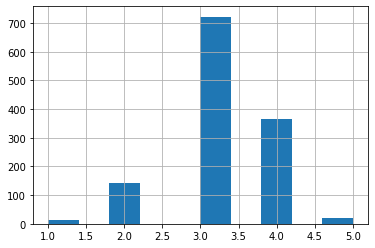

In [93]:
df['looks'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D0297C8>,
      dtype=object)

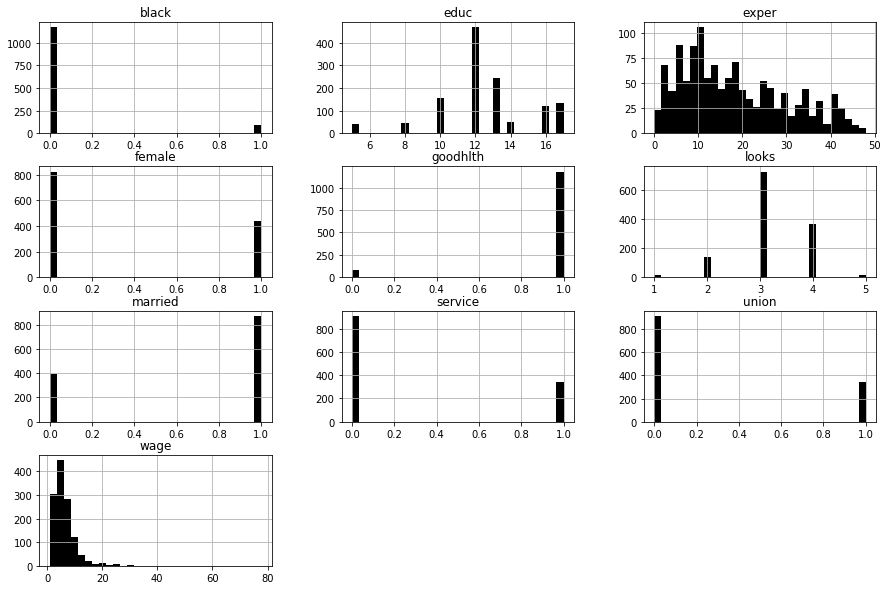

In [96]:
# Построение гистограммы сразу для всех признаков
df.hist(color='k',bins=30,figsize=(15,10))
plt.show()

Полезным также является график типа box plot ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.



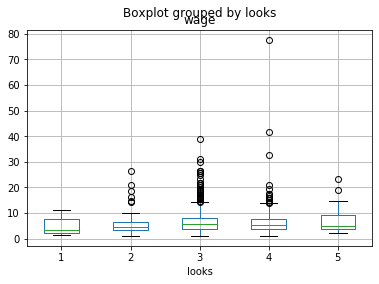

In [101]:
df.boxplot(column='wage',by='looks')
plt.show()

Можно сделать это, сгруппировав данные по какому-либо другому признаку:

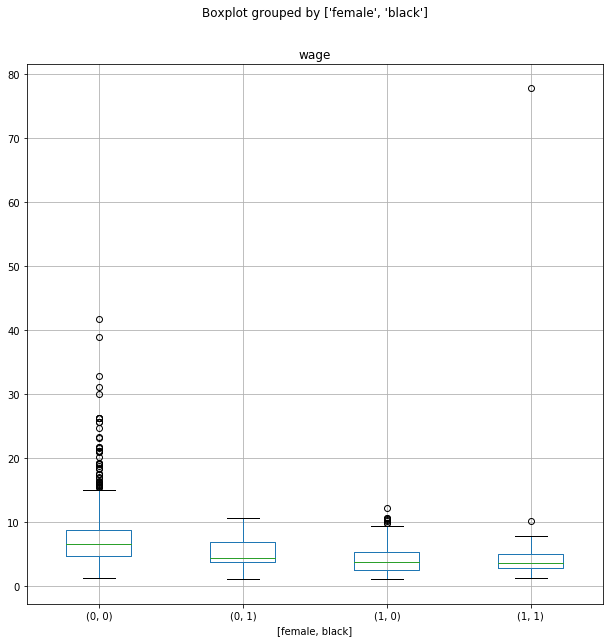

In [103]:
df.boxplot(column='wage',by=['female','black'],figsize=(10,10))
plt.show()